### Customer Segmentation

Problem Statement

Customer segmentation lies at the heart of every consumer facing business nowadays which involves being able to identify different types of customers and then figuring out ways to find more of those individuals so you can… you guessed it, get more customers!

In this assessment, you'll be doing exactly that, albeit with the help of K-Means clustering and observe how you can form groups of customers exhibiting similar behaviour.

Why solve this project

Successfully solving this project will help you apply the following skills:

- Data Manipulation
- Dimensionality Reduction Technique with PCA
- KMeans clustering
- Interpreting clusters with visualization

In [22]:
import warnings
import pprint
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.float_format = '{:.2f}'.format

##### Combine into a single dataframe

In [2]:
path

There are two Excel sheets at your disposal. The first one is called OfferInformation which contains information on the offers extended on products. The other sheet is Transactions which contains information on customers' purchase records. 

In [41]:
# import packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 


# Load Offers
offers = pd.read_excel(path, sheet_name=0)
print("Offers:")
print(offers.head())

print()
print()
# Load Transactions
transactions = pd.read_excel(path, sheet_name=1)
transactions['n'] = 1
print("Transactions:")
print(transactions.head())

print()
print()
# Merge dataframes
df = pd.merge(transactions, offers)

# Look at the first 5 rows
df.head()

Offers:
   Offer #  Campaign            Varietal  Minimum Qty (kg)  Discount (%)       Origin  Past Peak
0        1   January              Malbec                72            56       France      False
1        2   January          Pinot Noir                72            17       France      False
2        3  February           Espumante               144            32       Oregon       True
3        4  February           Champagne                72            48       France       True
4        5  February  Cabernet Sauvignon               144            44  New Zealand       True


Transactions:
  Customer Last Name  Offer #  n
0              Smith        2  1
1              Smith       24  1
2            Johnson       17  1
3            Johnson       24  1
4            Johnson       26  1




,Customer Last Name,Offer #,n,Campaign,Varietal,Minimum Qty (kg),Discount (%),Origin,Past Peak
0,Smith,2,1,January,Pinot Noir,72,17,France,False
1,Rodriguez,2,1,January,Pinot Noir,72,17,France,False
2,Martin,2,1,January,Pinot Noir,72,17,France,False
3,Jackson,2,1,January,Pinot Noir,72,17,France,False
4,Campbell,2,1,January,Pinot Noir,72,17,France,False


##### Create an Offer-Transaction pivot table

In [42]:
# Code starts here

# create pivot table
matrix = df.pivot_table(index='Customer Last Name', columns='Offer #', values='n')

# replace missing values with 0
matrix.fillna(0, inplace=True)

# reindex pivot table
matrix.reset_index(inplace=True)

# display first 5 rows
matrix.head()

# Code ends here

Offer #,Customer Last Name,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,Adams,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00
1,Allen,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
2,Anderson,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
3,Bailey,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
4,Baker,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00


##### Use Kmeans to cluster data

In [43]:
# import packages
from sklearn.cluster import KMeans

# Code starts here

# initialize KMeans object
cluster = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)

# create 'cluster' column
matrix['cluster'] = cluster.fit_predict(matrix[matrix.columns[1:]])

matrix.head()
# Code ends here

Offer #,Customer Last Name,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,cluster
0,Adams,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0
1,Allen,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,2
2,Anderson,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1
3,Bailey,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0
4,Baker,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,2


##### Visualize clusters using PCA

Now that you have clustered your data, it will be great if you can perform some sort of visualization for effective interpretition. But since the data at hand is multidimensional, you cannot simply do it on a 2-D graph. A way around is using PCA to reduce the dimensionality to two dimensions so that you can visualize the clusters

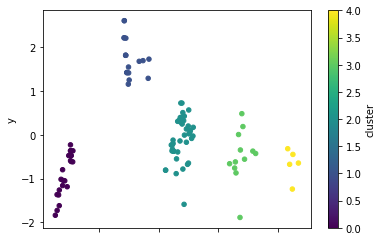

In [46]:
# import packages
from sklearn.decomposition import PCA

# Code starts here

# initialize pca object with 2 components
pca = PCA(n_components=2, random_state=0)

# create 'x' and 'y' columns donoting observation locations in decomposed form
matrix['x'] = pca.fit_transform(matrix[matrix.columns[1:]])[:,0]
matrix['y'] = pca.fit_transform(matrix[matrix.columns[1:]])[:,1]

# dataframe to visualize clusters by customer names
clusters = matrix.iloc[:,[0,33,34,35]]
# visualize clusters
clusters.plot.scatter(x='x', y='y', c='cluster', colormap='viridis')
plt.show()

# Code ends here

##### Which cluster orders the most `Champagne`?

In [47]:
# Code starts here

# merge 'clusters' and 'transactions'
data = pd.merge(clusters, transactions)
print(data.head())
print('='*25)


# merge `data` and `offers`
data = pd.merge(offers, data)
print(data.head())
print('='*25)

# initialzie empty dictionary
champagne = {}

# iterate over every cluster
for val in data.cluster.unique():
    # observation falls in that cluster
    new_df = data[data.cluster == val]
    # sort cluster according to type of 'Varietal'
    counts = new_df['Varietal'].value_counts(ascending=False)
    # check if 'Champagne' is ordered mostly
    if counts.index[0] == 'Champagne':
        # add it to 'champagne'
        champagne[val] = (counts[0])

# get cluster with maximum orders of 'Champagne' 
cluster_champagne = max(champagne, key=champagne.get)

# print out cluster number
print(cluster_champagne)
#     print('='*50)

  Customer Last Name  cluster     x     y  Offer #  n
0              Adams        0 -3.21 -0.80       18  1
1              Adams        0 -3.21 -0.80       29  1
2              Adams        0 -3.21 -0.80       30  1
3              Allen        2  0.84  0.32        9  1
4              Allen        2  0.84  0.32       27  1
   Offer # Campaign Varietal  Minimum Qty (kg)  Discount (%)  Origin  Past Peak Customer Last Name  cluster    x     y  n
0        1  January   Malbec                72            56  France      False             Butler        3 2.56 -0.62  1
1        1  January   Malbec                72            56  France      False             Fisher        3 2.73 -0.35  1
2        1  January   Malbec                72            56  France      False             Foster        3 2.82  0.19  1
3        1  January   Malbec                72            56  France      False            Jackson        3 2.78  0.48  1
4        1  January   Malbec                72            56  Fran

##### Which cluster of customers favours discounts more on an average?

In [48]:
# Code starts here

# empty dictionary
discount = {} 

# iterate over cluster numbers
for val in data.cluster.unique():
    # dataframe for every cluster
    new_df = data[data.cluster == val]
    # average discount for cluster
    counts = new_df['Discount (%)'].values.sum() / len(new_df)
    # adding cluster number as key and average discount as value 
    discount[val] = counts

# cluster with maximum average discount
cluster_discount = max(discount, key=discount.get)
print(cluster_discount)

# Code ends here

4
